In [1]:
import sympy as sym
import numpy as np
import scipy as sp
from scipy import linalg,spatial,signal

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

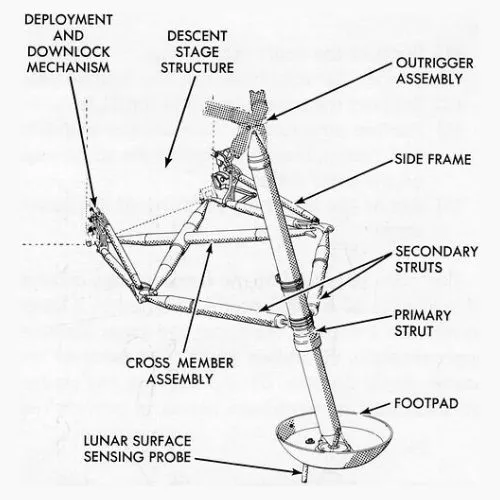

In [2]:
def zgosti_mrezo(vozlisca_osn, elementi_osn, ele_nr):

    vozlisca = np.copy(vozlisca_osn)
    elementi = np.empty((0,2), int)

    for element in elementi_osn:
        dist = sp.spatial.distance.euclidean(vozlisca_osn[element[0]],vozlisca_osn[element[1]])
        # n = np.round(dist/approx_elem_size).astype(int)

        x_coor = np.linspace(vozlisca[element[0],0], vozlisca_osn[element[1],0],n)[1:-1]
        y_coor = np.linspace(vozlisca[element[0],1], vozlisca_osn[element[1],1],n)[1:-1]
        voz = np.block([[x_coor],[y_coor]]).T

        novi_ind_vozlisc = len(vozlisca) + np.arange(len(voz))
        vozlisca = np.append(vozlisca, voz, axis = 0)
        sez_voz = np.block([element[0],novi_ind_vozlisc,element[1]])
        elem = np.array([[sez_voz[_],sez_voz[_+1]] for _ in range(len(sez_voz)-1)])
        elementi = np.append(elementi, elem, axis = 0)
        
    return(vozlisca, elementi)

In [3]:
# PALIČJE

# masna matrika
def M_p(A, L, ρ):

    M = ρ*A*L/6*np.array([
    [2, 0, 1, 0],
    [0, 2, 0, 1],
    [1, 0, 2, 0],
    [0, 1, 0, 2]])
    
    return M

def K_p(A, E, L, α):

    c = np.cos(α)
    s = np.sin(α)
    
    K = A*E/L*np.array([
    [ c**2,   s*c, -c**2,  -s*c],
    [  s*c,  s**2,  -s*c, -s**2],
    [-c**2,  -s*c,  c**2,   s*c],
    [ -c*s, -s**2,   s*c,  s**2]])
    
    return K

In [7]:
# PALIČJE 3D

# masna matrika
def M_p(A, L, ρ):

    M = ρ*A*L/6*np.array([
    [2, 0, 0, 1, 0, 0],
    [0, 2, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [1, 0, 0, 2, 0, 0],
    [0, 1, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0]])
    
    return M

def K_p(A, E, L, α):

    c = np.cos(α)
    s = np.sin(α)
    
    K = A*E/L*np.array([
    [ c**2,   s*c, 0, -c**2,  -s*c, 0],
    [  s*c,  s**2, 0,  -s*c, -s**2, 0],
         [0, 0, 0, 0, 0, 0],
    [-c**2,  -s*c, 0,  c**2,   s*c, 0],
    [ -c*s, -s**2, 0,  s*c,  s**2, 0],
     [0, 0, 0, 0, 0, 0]])
    
    return K

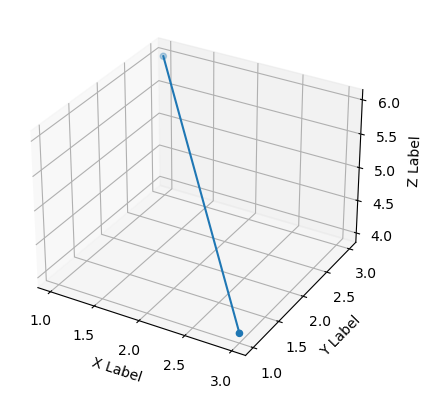

array([[3, 1, 4],
       [1, 3, 6]])

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate some random data
data = np.random.normal(0, 1, (10, 3))
data = np.array([[3, 1, 4], [1, 3, 6]]) #, [3, 1, 4], [3, 3, 4]])
ele = np.array([[0, 1]])


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points as a scatter plot
ax.scatter(data[:, 0], data[:, 1], data[:, 2])

# Connect the points with lines
for i in range(len(data)-1):
    ax.plot([data[i,0], data[i+1,0]], [data[i,1], data[i+1,1]], [data[i,2], data[i+1,2]])

    
def split_line(coordinates, element, n):
    # Get the coordinates of the two endpoints
    p1 = coordinates[element[0]]
    p2 = coordinates[element[1]]
    
    # Create a linearly spaced array of points along the line
    points = np.linspace(p1, p2, n+1)
    
    # Return the points excluding the endpoints
    return points[1:-1]

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Enable mouse interaction
ax.mouse_init()

# Show the plot
plt.show()

data

In [ ]:
import numpy as np

def split_line(coordinates, element, n):
    # Get the coordinates of the two endpoints
    p1 = coordinates[element[0]]
    p2 = coordinates[element[1]]
    
    # Create a linearly spaced array of points along the line
    points = np.linspace(p1, p2, n+1)
    
    # Return the points excluding the endpoints
    return points[1:-1]


In [29]:
ele = np.array([[0, 1], [0, 2]])
ele2 = np.array([[0, 1], [0, 2]])
np.append(ele, ele2).reshape(2, 4)

array([[0, 1, 0, 2],
       [0, 1, 0, 2]])

In [33]:
import numpy as np

data = np.array([[3, 1, 4], [1, 3, 6], [3, 1, 4], [3, 3, 4]])
ele = np.array([[0, 1], [0, 2]])

def split_line(coordinates, element, n):
    # Get the coordinates of the two endpoints
    points_a = np.array([[]])
    for i in len(element):
        p1 = coordinates[element[i][0]]
        p2 = coordinates[element[i][1]]
    
        # Create a linearly spaced array of points along the line
        points = np.linspace(p1, p2, n+1)
        points_a = np.vstack(points_a, points)
    
    # Return the points excluding the endpoints
    return points_a[:]

new_points = split_line(data, ele, 5)

SyntaxError: invalid syntax (3669355946.py, line 15)

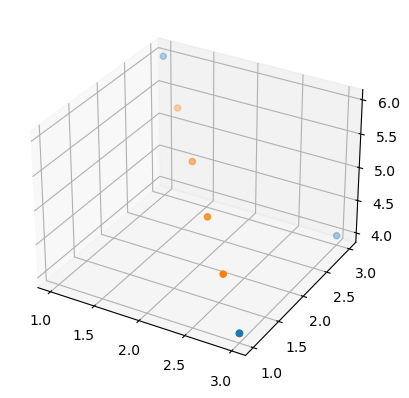

In [22]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points as a scatter plot
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.scatter(new_points[:, 0], new_points[:, 1], new_points[:, 2])

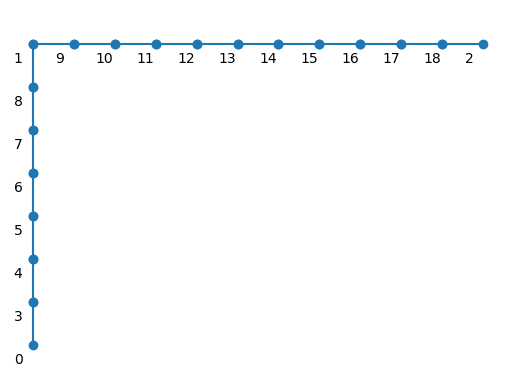

In [15]:
# Podstruktura A - okvir

# podatki
L1 = 0.8 # m
L2 = 1.2 # m
h = 0.030 # m

ρ_A = 2700 # kg /m3
E_A = 70e9 # Pa

A_A = h*h # m^2
I_A = h*h**3/12 # m^4

# osnovna geometrija
vozlisca_osn_A = np.array([[0,0],[0,L1],[L2,L1]])
elementi_osn_A = np.array([[0,1],[1,2]])

# zgostitev mreže
approx_elem_size = 0.1 # m
vozlisca_A, elementi_A = zgosti_mrezo(vozlisca_osn_A, elementi_osn_A, approx_elem_size)

# izris
plt.axis('equal')
[plt.plot(*vozlisca_A[e].T,'-o',c='C0') for e in elementi_A];
[plt.text(*c,n) for n,c in enumerate(vozlisca_A-0.05)];
plt.axis('off');

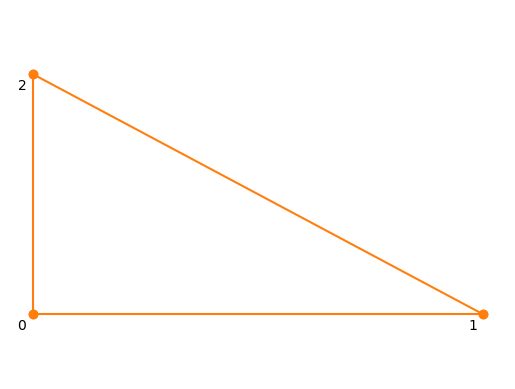

In [6]:
# Podstruktura B - paličje

# podatki
L3 = 0.8 # m
L4 = 1.5 # m
φ = 0*np.pi/4 # rad
d = 0.010 # m

ρ_B = 7800 # kg /m3
E_B = 210e9 # Pa
A_B = np.pi * d**2 / 4 # m^2

# osnovna geometrija
vozlisca_B = np.array([[L2,0],[L2+L4,0],[L2,L3]])
elementi_B = np.array([[0,1],[1,2],[2,0]])

# izris
plt.axis('equal')
[plt.plot(*vozlisca_B[e].T,'-o',c='C1') for e in elementi_B];
[plt.text(*c,n) for n,c in enumerate(vozlisca_B-0.05)];
plt.axis('off');

# zlaganje
n_ps_B = 2*len(vozlisca_B)
M_glob_B = np.zeros((n_ps_B,n_ps_B))
K_glob_B = np.zeros((n_ps_B,n_ps_B))

for element in elementi_B:
    Le = sp.spatial.distance.euclidean(vozlisca_B[element[0]], vozlisca_B[element[1]])
    αe = np.arctan2(np.diff(vozlisca_B[element,1]) , np.diff(vozlisca_B[element,0]))[0]
    ind = (2*element[:,None] + np.array([0, 1])).flatten()
    
    M_glob_B[ind[:,None],ind] += M_p(A_B, Le, ρ_B)
    K_glob_B[ind[:,None],ind] += K_p(A_B, E_B, Le, αe)

In [7]:
# robni pogoji in povezava podstruktur

# A - robni pogoji
ind_vpetih_ps = np.array([0,1,2])
C_A_rp = np.zeros((len(ind_vpetih_ps),n_ps_A))
C_A_rp[np.arange(len(ind_vpetih_ps)),ind_vpetih_ps] = 1

# B - robni pogoji - ročno za boljše razumevanje
C_B_rp = np.array([[0, 0, np.tan(φ), -1, 0, 0]])

C_rp = sp.linalg.block_diag(C_A_rp,C_B_rp)

# AB povezava - ročno za boljše razumevanje
C_A_pov = np.zeros((2,n_ps_A))
C_A_pov[[0,1],[6,7]] = 1

C_B_pov = np.zeros((2,n_ps_B))
C_B_pov[[0,1],[4,5]] = -1

C_pov = np.hstack([C_A_pov,C_B_pov]) 

# združeno
C = np.vstack([C_rp, C_pov])
L_AB = sp.linalg.null_space(C)

# združitev masne in togostne matrike
M_glob_AB = L_AB.T @ sp.linalg.block_diag(M_glob_A, M_glob_B) @ L_AB
K_glob_AB = L_AB.T @ sp.linalg.block_diag(K_glob_A, K_glob_B) @ L_AB

In [8]:
# problem lastnih vrednosti
eig_val, eig_vec = sp.linalg.eig(K_glob_AB, M_glob_AB)

# urejanje po velikosti
_ind = np.argsort(np.abs(eig_val))
eig_val = np.abs(eig_val[_ind])
eig_vec = eig_vec[:,_ind]

eig_freq = np.abs(eig_val)**0.5 / 2 / np.pi

# interpretacija rezultata
eig_vec_A = L_AB[:n_ps_A,:] @ eig_vec
eig_vec_B = L_AB[-n_ps_B:,:] @ eig_vec

In [9]:
# lastne frekvence [Hz]
eig_freq[:6].round(1)

array([  4.7,  18.7,  67.8, 185.1, 253.8, 437.4])

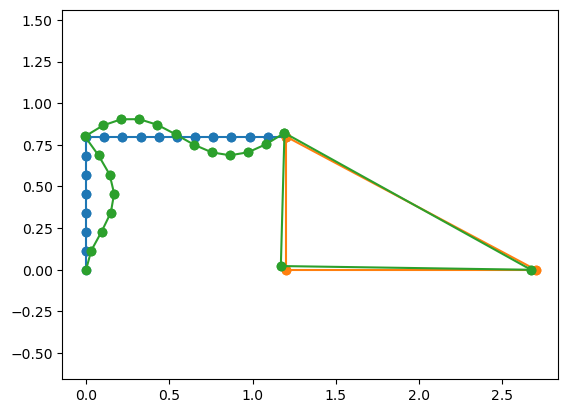

In [10]:
# animacija lastnih oblik
m = 3
s = 2

# podstruktura A
pomiki_x_A = eig_vec_A[0::3,m].real
pomiki_y_A = eig_vec_A[1::3,m].real

# podstruktura B
pomiki_x_B = eig_vec_B[0::2,m].real
pomiki_y_B = eig_vec_B[1::2,m].real

# stacionarni izris
def_vozlisca_A = np.copy(vozlisca_A)
def_vozlisca_A[:,0] += pomiki_x_A * s
def_vozlisca_A[:,1] += pomiki_y_A * s

def_vozlisca_B = np.copy(vozlisca_B)
def_vozlisca_B[:,0] += pomiki_x_B * s
def_vozlisca_B[:,1] += pomiki_y_B * s

# osnovno stanje
plt.axis('equal')
[plt.plot(*vozlisca_A[e].T,'-o',c='C0') for e in elementi_A];
[plt.plot(*vozlisca_B[e].T,'-o',c='C1') for e in elementi_B];

# deformirano stanje
plt.axis('equal')
[plt.plot(*def_vozlisca_A[e].T,'-o',c='C2') for e in elementi_A];
[plt.plot(*def_vozlisca_B[e].T,'-o',c='C2') for e in elementi_B];